# **Модуль pickle**
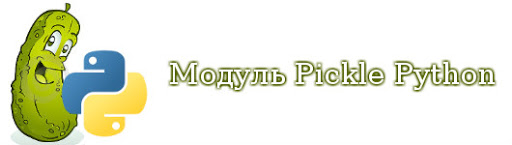

Модуль pickle реализует алгоритм сериализации и десериализации объектов Python. "Pickling" - процесс преобразования объекта Python в поток байтов, а "unpickling" - обратная операция, в результате которой поток байтов преобразуется обратно в Python-объект. Это можно сравнить с процессом маринования огурцов, поэтому вы и видите такую картинку выше.
Так как поток байтов легко можно записать в файл, модуль pickle применяется для сохранения и загрузки сложных объектов в Python.


## **С какими данными может работать модуль pickle?**
*   Логические типы: None, True и False
*   Числа: int, float, комплексные числа
*   Строки и байты: str, byte, bytearray
*   кортежи, списки, наборы и словари, содержащие только поддерживаемые (приведенные в этом списке) объекты
*   функции, определенные на верхнем уровне модуля (с использованием def, а не lambda)

*   встроенные функции, определенные на верхнем уровне модуля

*   классы, определенные на верхнем уровне модуля
*   экземпляры классов, у которых тип данных результата вызова  __dict__, __getstate__() поддерживается (приведен в этом списке) 

**Что значит "верхний уровень"?**

Например, модуль os.path - это модуль path, вложенный в модуль os. В данном случае модуль os - модуль верхнего уровня. Тоже самое с функциями и классами.

## **Примеры использования**

### **Пример использования модуля pickle со словарем**

In [ ]:
import pickle

data = {
    "numbers": (1, 2, 3),
    "words": ("hello", "world"),
    "My_english_is_cool": (False, False, False)
  }

print(data)

with open ('data.pickle', 'wb') as pickle_file:
  pickle.dump(data, pickle_file)

with open ('data.pickle', 'rb') as pickle_file:
  new_data = pickle.load(pickle_file)

print(new_data)


{'numbers': (1, 2, 3), 'words': ('hello', 'world'), 'My_english_is_cool': (False, False, False)}
{'numbers': (1, 2, 3), 'words': ('hello', 'world'), 'My_english_is_cool': (False, False, False)}


### **Пример использования модуля pickle с классом**

In [ ]:
import pickle

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def say_hello(self):
        print('Hello, %s!' % (self.name))

Rakhman = Person('Rakhman', 19)

with open('person.pickle', mode='wb') as pickle_file:
    pickle.dump(Rakhman, pickle_file)

with open('person.pickle', mode='rb') as pickle_file:
    p_load = pickle.load(pickle_file)
    p_load.say_hello()

Hello, Rakhman!


## **Протоколы**

**Сейчас есть 6 протоколов "маринования"**

Чем выше протокол, тем более новая версия Python нужна для его работы.

*   Протокол версии 0 является оригинальным “читаемым” протоколом и обратно совместим с более ранними версиями Python,
*   Протокол версии 1 - это старый двоичный формат, который также совместим с более ранними версиями Python,
*   Протокол версии 2 был представлен в Python 2.3. Это обеспечивает гораздо более эффективное "маринование" классов нового стиля. Для получения информации об улучшениях, внесенных протоколом 2, см. [PEP 307](https://www.python.org/dev/peps/pep-0307/).
*   Протокол версии 3 был добавлен в Python 3.0. Он имеет явную поддержку байтовых объектов и не может быть распакован Python 2.x. Это протокол по умолчанию в Python 3.0–3.7.
*   Протокол версии 4 был добавлен в Python 3.4. Он добавляет поддержку очень больших объектов, "маринование" большего количества видов объектов и некоторые оптимизации формата данных. Начиная с Python 3.8, это протокол по умолчанию. Для получения информации об улучшениях, внесенных протоколом 4, см. [PEP 3154](https://www.python.org/dev/peps/pep-3154).
*   Протокол версии 5 был добавлен в Python 3.8. Он добавляет поддержку [внеполосных данных](https://ru.wikipedia.org/wiki/%D0%92%D0%BD%D0%B5%D0%BF%D0%BE%D0%BB%D0%BE%D1%81%D0%BD%D1%8B%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5) и ускорение для внутриполосных данных. Для получения информации об улучшениях, внесенных протоколом 5, см.  [PEP 574](https://www.python.org/dev/peps/pep-0574/).

## **Модуль pickle предоставляет следующие функции:**

### **pickle.dump**(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)
Записывает сериализованный объект в файл.

Изменено в версии 3.8: добавлен аргумент buffer_callback, по умолчанию равный None.

In [ ]:
import pickle

obj = "Million dollarov"

with open('dump_example.pickle', 'wb') as karman:
    pickle.dump(obj, karman, 3)

### **pickle.dumps**(obj, protocol=None, *, fix_imports=True, buffer_callback=None)

Возвращает "маринованное" представление obj в виде байтового объекта, а не записывает его в файл.

Изменено в версии 3.8: добавлен аргумент buffer_callback.

In [ ]:
import pickle

obj = "Million dollarov x2 = dva milliona dollarov"

obj2 = pickle.dumps(obj, 3)

print(obj2)

b'\x80\x03X+\x00\x00\x00Million dollarov x2 = dva milliona dollarovq\x00.'


### **pickle.load**(file, *, fix_imports=True, encoding="ASCII", errors="strict", buffers=None)

Загружает "маринованное" представление объекта из файла и возвращает восстановленную иерархию объектов, указанную в нем.

Версия протокола "маринованного" объекта определяется автоматически, поэтому аргумент протокола не требуется. Байты, прошедшие мимо "маринованного" объекта, игнорируются.

Изменено в версии 3.8: добавлен аргумент buffers.

Если **fix_imports** имеет значение true и протокол меньше 3, pickle попытается сопоставить новые имена Python 3 со старыми именами модулей, используемыми в Python 2, чтобы поток данных pickle был доступен для чтения с Python 2.

Если **buffer_callback** равен None (по умолчанию), представления буфера сериализуются в файл как часть потока pickle. Если buffer_callback не равен None, то его можно вызывать любое количество раз с помощью представления буфера. Если обратный вызов возвращает ложное значение (например, None), данный буфер находится вне диапазона; в противном случае буфер сериализуется внутри полосы, то есть внутри потока pickle. 

Если buffer_callback не равен None и протокол равен None или меньше 5 - вызовется ошибка.

In [ ]:
import pickle

with open('dump_example.pickle', 'rb') as karman:
    million_dollarov = pickle.load(karman)
    print(million_dollarov)

Million dollarov


### **pickle.loads**(data, /, *, fix_imports=True, encoding="ASCII", errors="strict", buffers=None)

Возвращает восстановленную иерархию объектов "маринованного" представления. Данные должны быть байтоподобными объектами.

Версия протокола "маринованного" объекта определяется автоматически, поэтому аргумент протокола не требуется. Байты, прошедшие мимо "маринованного" представления объекта, игнорируются.

Изменено в версии 3.8: добавлен аргумент buffers.

In [ ]:
import pickle

obj = pickle.dumps("Million dollarov x2 = dva milliona dollarov", 3)

print(obj)

obj2 = pickle.loads(obj)

print(obj2)

b'\x80\x03X+\x00\x00\x00Million dollarov x2 = dva milliona dollarovq\x00.'
Million dollarov x2 = dva milliona dollarov


## **В модуле pickle есть следующие константы**

pickle.**HIGHEST_PROTOCOL**

Возвращает наивысшую доступную версию протокола. Значение может быть передано в качестве значения протокола функциям dump() и dumps ().

pickle.**DEFAULT_PROTOCOL**

Возвращает версию протокола по умолчанию

In [ ]:
import pickle

print(pickle.HIGHEST_PROTOCOL)
print(pickle.DEFAULT_PROTOCOL)

4
3


## **Важные замечания:**

### **Чем отличаются протоколы pickle от JSON?**
Вот фундаментальные различия между pickle и JSON:

*   JSON - это формат текстовой сериализации (он выводит текст unicode, хотя большую часть времени он затем кодируется в utf-8), когда pickle - это двоичный формат сериализации;
*   Соответственно, JSON - читаемый для человека формат, а pickle - нет;
*   JSON совместим и широко используется за пределами экосистемы Python, в то время как pickle специфичен для Python;
*   JSON, по умолчанию, может представлять только подмножество встроенных типов Python и никаких пользовательских классов; pickle может представлять чрезвычайно большое количество типов Python (многие из них автоматически, с помощью умного использования средств самоанализа Python; сложные случаи могут быть решены путем реализации конкретных объектных API);
*   В отличие от pickle, десериализация ненадежного JSON сама по себе не создает уязвимости при выполнении произвольного кода.



### **Не создает уязвимости? Что?**

Все правильно. В официальной документации сразу после определения самого модуля идет красная рамка с таким текстом:

> **Предупреждение:** Модуль pickle небезопасен. Не загружайте с помощью модуля pickle файлы из ненадёжных источников. Это может привести к необратимым последствиям (Ладно, там немного по-другому эта фраза написана, но суть такая).

> Рассмотрите возможность подписания данных с помощью hmac, если вам нужно убедиться, что они не были подделаны.

> Более безопасные форматы сериализации, такие как json, могут быть более подходящими, если вы обрабатываете ненадежные данные.

### **Что это значит простыми словами?**

Формат pickle использует полноценную виртуальную машину. Если код, введенный в машину, контролируется злоумышленником, он может выполнять действия, выходящие далеко за рамки сериализации объектов. Это означает, что "размаринование" может запускать любой вызываемый объект в любом месте с любыми аргументами. Даже если соответствующий модуль еще не был импортирован, pickle с удовольствием импортирует его. Например, для выполнения os.system требуется всего пара десятков символов.

Обратите внимание, в примере ниже (который я собрал с двух разных сайтов (как и текст выше :)), модуль os.path даже не импортирован изначально.

In [ ]:
import pickle

class Bomb:
    def __init__(self, name):
        self.name = name

    def __getstate__(self):
        return self.name

    def __setstate__(self, state):
        import os.path #загружаем необходимый модуль
        self.name = state
        print(f'Bang! From {self.name}.')
        example = os.path.join('Здесь', 'Могли', 'Украсть', 'Миллион', 'Долларов') #Да.
        print(example)

bomb = Bomb('Rakhman')

pickled_bomb = pickle.dumps(bomb)
unpickled_bomb = pickle.loads(pickled_bomb)

Bang! From Rakhman.
Здесь/Могли/Украсть/Миллион/Долларов


## **Модуль cPickle**

В больших проектах консервирование модулем pickle занимает достаточно много времени. Эту проблему решили тем, что был написан подобный модуль, но уже не на Питоне, а на С, что, по заявлению разработчиков, ускорило его производительность в тысячи раз. Но cPickle не позволяет пользователю создавать подклассы от pickle. Если подклассы не важны, вероятно, лучше использовать cPickle.

А вообще, хорошая идея - использовать следующую конструкцию:

```
try:
   import cPickle as pickle
except:
   import pickle
```



# **Задание**
Создайте словарь с тремя ключами, присвоив им значения с разными типами данных. Запишите словарь в файл с помощью модуля pickle, затем откройте этот файл и выведите его содержимое на экран. 
